In [1]:
show = True

### SafetyPointGoal1-v0

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')

runs = ['PPO-unconstraint','PPO-lag','SIM-cost']
num_seed=4
save_path = './figures/SafetyPointGoal1-v0'
constraint = 50
step_size = 50000

run_dirs = {
    'PPO-unconstraint'      :'.\log_data\SafetyPointGoal1-v0\PPO-unconstraint',
    'SIM-cost'      :'.\log_data\SafetyPointGoal1-v0\SIM-cost',
    'PPO-lag'      :'.\log_data\SafetyPointGoal1-v0\PPO-lag(50)',
}

run_colors = {
    'SIM-cost'     :cmap.colors[3],
    'PPO-lag'               :cmap.colors[2],
    'PPO-unconstraint'      :cmap.colors[0],
}

line_widths = {
    'SIM-cost'     :4,
    'PPO-lag'               :3,
    'PPO-unconstraint'      :3,
}

run_labels = {
    'PPO-lag'               :'PPO-lag',
    'SIM-cost'      :'SIM (unknown cost)',
    'PPO-unconstraint'      :'PPO-unconstraint',
}

run_lines = {
    'PPO-lag'               :'-',
    'SIM-cost'      :'-',
    'PPO-unconstraint'      :'-'
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)    

[WinError 3] The system cannot find the path specified: './figures/SafetyPointGoal1-v0'


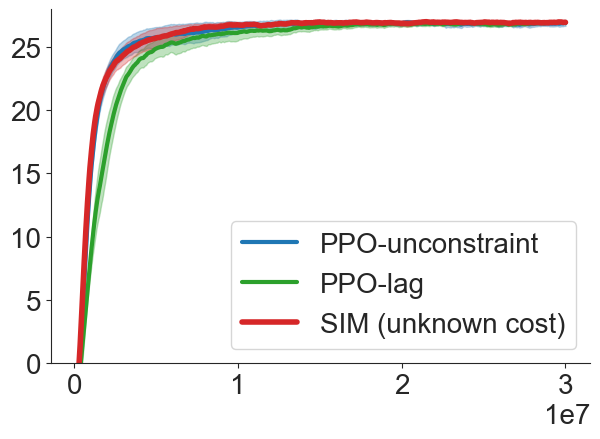

In [3]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)
plt.ylim((0, 28)) # set the ylim to bottom, top
plt.ylim(0, 28) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'UKC_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

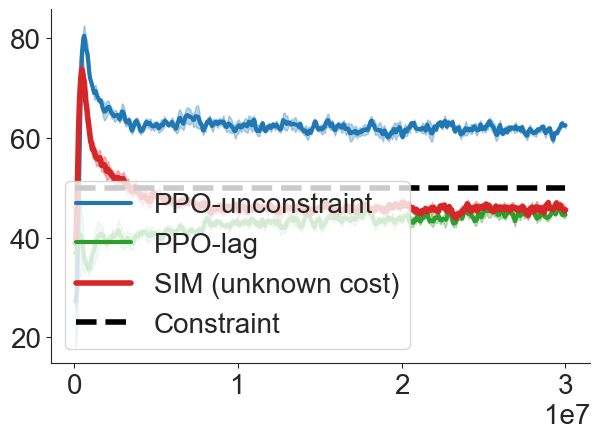

In [4]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')
plt.legend(loc='lower left')
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'UKC_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

### SafetyCarPush1-v0

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')
task = 'SafetyCarPush1-v0'

runs = ['PPO-unconstraint','PPO-lag','SIM-cost']
num_seed=4
save_path = f'./figures/{task}'
constraint = 32
step_size = 50000

run_dirs = {
    'PPO-unconstraint'      :f'.\log_data\{task}\PPO-unconstraint',
    'SIM-cost'     :f'.\log_data\{task}\SIM-cost',
    'PPO-lag'               :f'.\log_data\{task}\PPO-lag(30)',
}



line_widths = {
    'SIM-cost'     :4,
    'PPO-lag'               :3,
    'PPO-unconstraint'      :3,
}

run_labels = {
    'PPO-lag'               :'PPO-lag',
    'SIM-cost'      :'SIM (unknown cost)',
    'PPO-unconstraint'      :'PPO-unconstraint',
}
run_colors = {
    'SIM-cost'     :cmap.colors[3],
    'PPO-lag'               :cmap.colors[2],
    'PPO-unconstraint'      :cmap.colors[0],
}
run_lines = {
    'PPO-lag'               :'-',
    'SIM-cost'      :'-',
    'PPO-unconstraint'      :'-'
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)    

[WinError 3] The system cannot find the path specified: './figures/SafetyCarPush1-v0'


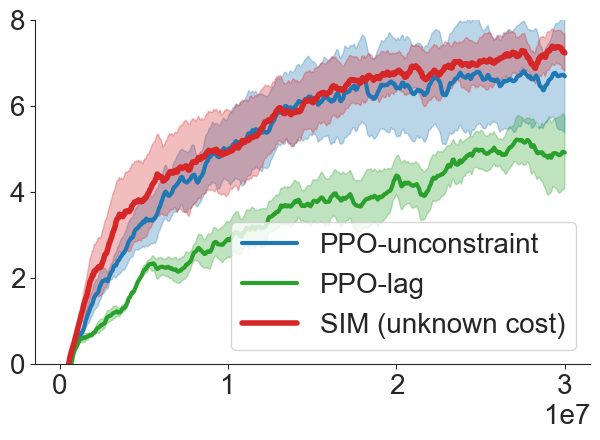

In [6]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)
plt.ylim((0, 8)) # set the ylim to bottom, top
plt.ylim(0, 8) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'UKC_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

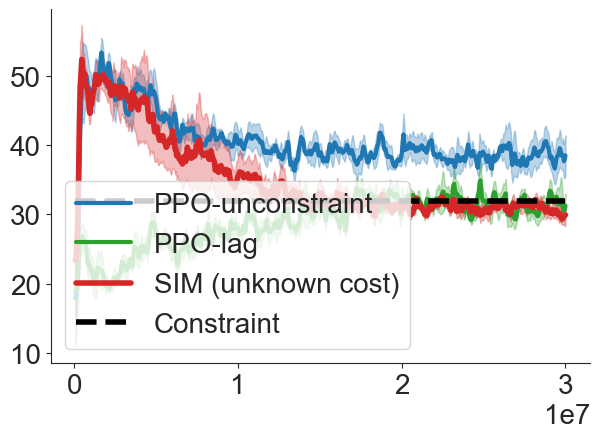

In [7]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')
plt.legend(loc='lower left')
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'UKC_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')